In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

from modules import *

In [2]:
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'Arial'

In [3]:
# load data
with open('data/data_simulation/data_branch.p', 'rb') as f:
    data = pickle.load(f)

n_depth = data['n_depth']
n_branch_set = data['n_branch_set']
n_sample_set = data['n_sample_set']
n_world = data['n_world']
n_test = data['n_test']
sig_r = data['sig_r']
expected_rewards = data['expected_rewards']
max_rewards = data['max_rewards']
expected_accuracies = data['expected_accuracies']

branch: 2, optimal # of rollout: 2, maximum reward: 0.692
branch: 3, optimal # of rollout: 3, maximum reward: 0.599
branch: 4, optimal # of rollout: 4, maximum reward: 0.548
branch: 5, optimal # of rollout: 5, maximum reward: 0.498
branch: 6, optimal # of rollout: 6, maximum reward: 0.458
branch: 7, optimal # of rollout: 6, maximum reward: 0.430
branch: 8, optimal # of rollout: 6, maximum reward: 0.407


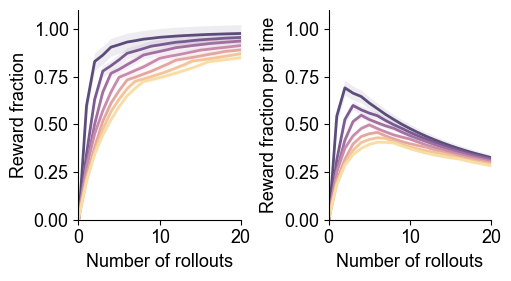

In [4]:
t_ratio = 1/10

colors = ['#5B4D7A', '#7A5B91', '#A26FA1', '#C88BAA', '#E3A7A0', '#F4C59A', '#F8DDA5']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5.2, 3))

for i in range(2):
    ax = axes[i]

    for i_branch in range(len(n_branch_set)):

        exrew = expected_rewards[i_branch, ...]
        if i == 1: # include time cost
            exrew  = exrew / (1 + np.array(n_sample_set)[:, None] * t_ratio)
                
        m = np.mean(exrew, axis = -1)
        s = np.std(exrew, axis = -1) / np.sqrt(exrew.shape[-1])
        norm = np.mean(max_rewards[i_branch, :])
        m /= norm
        s /= norm

        if i == 1:
            print('branch: %.0f, optimal # of rollout: %.0f, maximum reward: %.3f' % (n_branch_set[i_branch], n_sample_set[np.argmax(m)], np.max(m)))

        ax.plot(n_sample_set, m, color = colors[i_branch], label = n_branch_set[i_branch], lw = 2)
        ax.fill_between(n_sample_set, m - s, m + s, color = colors[i_branch], alpha = 0.1, linewidth = 0)
        ax.set_ylim((0, 1.1))

    ax.set_xlabel('Number of rollouts')
    if i == 0:
        ax.set_ylabel('Reward fraction')
    elif i == 1:
        ax.set_ylabel('Reward fraction per time')
    ax.set_xlim(0, n_sample_set[-1])

handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, n_branch_set, bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_branch/p_reward.pdf', bbox_inches = 'tight')

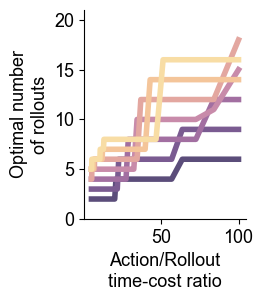

In [5]:
t_ratio_set = np.linspace(0.01, 0.2, 101)

plt.figure(figsize = (2.8, 3.2))

for i_branch in range(len(n_branch_set)):

    exrew = expected_rewards[i_branch, ...]
    exrew  = exrew[:, None, :] / (1 + np.array(n_sample_set)[:, None, None] * t_ratio_set[None, :, None])

    m = np.mean(exrew, axis = -1)
    optimal_n_samples = np.array(n_sample_set)[np.argmax(m, axis = 0)]

    plt.plot(1 / t_ratio_set, optimal_n_samples, color = colors[i_branch], lw = 4)

plt.xlabel('Action/Rollout\ntime-cost ratio')
plt.ylabel('Optimal number\nof rollouts')
plt.ylim(0, optimal_n_samples.max() + 5)
# plt.legend(n_branch_set, bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_branch/p_rollout_num_reward.pdf', bbox_inches = 'tight')

branch: 2, optimal # of rollout: 2, maximum reward: 0.493
branch: 3, optimal # of rollout: 3, maximum reward: 0.393
branch: 4, optimal # of rollout: 4, maximum reward: 0.334
branch: 5, optimal # of rollout: 5, maximum reward: 0.282
branch: 6, optimal # of rollout: 6, maximum reward: 0.251
branch: 7, optimal # of rollout: 7, maximum reward: 0.220
branch: 8, optimal # of rollout: 8, maximum reward: 0.200


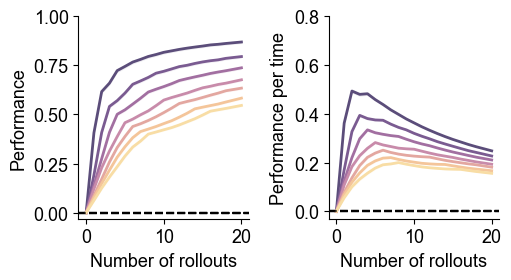

In [6]:
t_ratio = 1/8

colors = ['#5B4D7A', '#7A5B91', '#A26FA1', '#C88BAA', '#E3A7A0', '#F4C59A', '#F8DDA5']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5.2, 3))

for i in range(2):
    ax = axes[i]

    for i_branch, n_branch in enumerate(n_branch_set):

        chance_acc = 1 / n_branch
        exacc = (expected_accuracies[i_branch, ...] - chance_acc) / (1 - chance_acc)
        if i == 1: # include time cost
            exacc  = exacc / (1 + np.array(n_sample_set)[:, None] * t_ratio)
                
        m = np.mean(exacc, axis = -1)
        s = np.std(exacc, axis = -1) / np.sqrt(exacc.shape[-1])

        if i == 1:
            print('branch: %.0f, optimal # of rollout: %.0f, maximum reward: %.3f' % (n_branch_set[i_branch], n_sample_set[np.argmax(m)], np.max(m)))

        ax.plot(n_sample_set, m, color = colors[i_branch], label = n_branch_set[i_branch], lw = 2)
        ax.fill_between(n_sample_set, m - s, m + s, color = colors[i_branch], alpha = 0.1, linewidth = 0)
        ax.axhline(y = 0, linestyle = '--', color = 'k', alpha = 0.8)
        # ax.set_ylim((0, 1.0))

    ax.set_xlabel('Number of rollouts')
    if i == 0:
        ax.set_ylim((-0.03, 1))
        ax.set_ylabel('Performance')
    elif i == 1:
        ax.set_ylim((-0.03, 0.8))
        ax.set_ylabel('Performance per time')
    # ax.set_xlim(0, n_sample_set[-1])

handles, labels = ax.get_legend_handles_labels()
# plt.legend(handles, n_branch_set, bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_branch/p_accuracy.pdf', bbox_inches = 'tight')

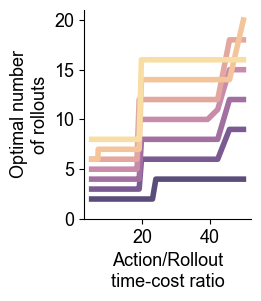

In [7]:
t_ratio_set = np.linspace(1/50, 1/5, 101)

plt.figure(figsize = (2.8, 3.2))

for i_branch in range(len(n_branch_set)):

    chance_acc = 1 / n_branch
    exacc = (expected_accuracies[i_branch, ...] - chance_acc) / (1 - chance_acc)
    exacc = exacc[:, None, :] / (1 + np.array(n_sample_set)[:, None, None] * t_ratio_set[None, :, None])

    m = np.mean(exacc, axis = -1)
    optimal_n_samples = np.array(n_sample_set)[np.argmax(m, axis = 0)]

    plt.plot(1 / t_ratio_set, optimal_n_samples, color = colors[i_branch], lw = 4)

plt.xlabel('Action/Rollout\ntime-cost ratio')
plt.ylabel('Optimal number\nof rollouts')
plt.ylim(0, optimal_n_samples.max() + 5)
# plt.legend(n_branch_set, bbox_to_anchor = (1, 0.5), loc = 'center left', fontsize = 10, frameon = False, title = 'Branch', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_branch/p_rollout_num_accuracy.pdf', bbox_inches = 'tight')